In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_csv('offreObjectif2.csv')

In [3]:
data.head()

,id_offre,intitule,description,image,qrcode,date_de_creation,nb_places,nombre_de_candidatures
0,1,Java Developper,A high-level programming language,https://www.actia.com/images/logo-actia.png,NaN,2024-03-01 23:41:03.000000,2,3
1,6,Ingenieur Data Science 400DT,Creer des algorithmes d'apprentissage automatique,/assets/vermegpng.png,NaN,2024-03-03 18:47:14.000000,2,10
2,18,Stage Ingénieur Systemes Embarques (1 an d'exp...,Conception et developpement de logiciels embar...,https://www.actia.com/images/logo-actia.png,NaN,2024-03-06 23:08:46.000000,1,1
3,20,react js et react native,Developpement d'une application web native,https://www.actia.com/images/logo-actia.png,http://api.qrserver.com/v1/create-qr-code/?dat...,2024-03-06 23:33:59.000000,5,5
4,22,Stage Développeur Firmware (6 mois d'expérienc...,Expérience dans le développement de firmwares ...,/assets/vermegpng.png,NaN,2024-03-31 22:39:48.000000,3,9


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_offre                43 non-null     int64 
 1   intitule                43 non-null     object
 2   description             43 non-null     object
 3   image                   7 non-null      object
 4   qrcode                  1 non-null      object
 5   date_de_creation        7 non-null      object
 6   nb_places               43 non-null     int64 
 7   nombre_de_candidatures  43 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ KB
None


In [5]:
print(data.describe())

        id_offre  nb_places  nombre_de_candidatures
count  43.000000  43.000000               43.000000
mean   39.813953   2.441860                3.906977
std    14.760397   1.622789                4.145071
min     1.000000   1.000000                0.000000
25%    30.500000   1.000000                1.000000
50%    41.000000   2.000000                3.000000
75%    51.500000   3.000000                4.000000
max    62.000000   8.000000               20.000000


In [6]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True) 


id_offre                  0.000000
intitule                  0.000000
description               0.000000
nb_places                 0.000000
nombre_de_candidatures    0.000000
image                     0.837209
date_de_creation          0.837209
qrcode                    0.976744
dtype: float64

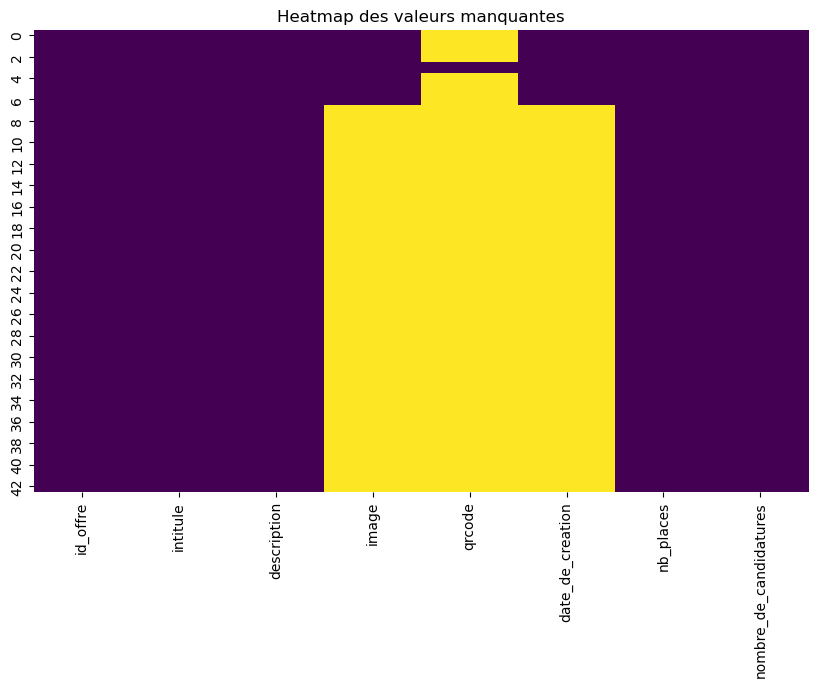

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes')
plt.show()

In [8]:
data['description'] = data['description'].str.lower()
data['intitule'] = data['intitule'].str.lower()

In [9]:
print(data.head())

   id_offre                                           intitule  \
0         1                                    java developper   
1         6                       ingenieur data science 400dt   
2        18  stage ingénieur systemes embarques (1 an d'exp...   
3        20                           react js et react native   
4        22  stage développeur firmware (6 mois d'expérienc...   

                                         description  \
0                  a high-level programming language   
1  creer des algorithmes d'apprentissage automatique   
2  conception et developpement de logiciels embar...   
3         developpement d'une application web native   
4  expérience dans le développement de firmwares ...   

                                         image  \
0  https://www.actia.com/images/logo-actia.png   
1                        /assets/vermegpng.png   
2  https://www.actia.com/images/logo-actia.png   
3  https://www.actia.com/images/logo-actia.png   
4               

In [10]:
data_selected = data.loc[:, ['description', 'intitule','nb_places','nombre_de_candidatures']]

In [11]:
data_selected.head()

,description,intitule,nb_places,nombre_de_candidatures
0,a high-level programming language,java developper,2,3
1,creer des algorithmes d'apprentissage automatique,ingenieur data science 400dt,2,10
2,conception et developpement de logiciels embar...,stage ingénieur systemes embarques (1 an d'exp...,1,1
3,developpement d'une application web native,react js et react native,5,5
4,expérience dans le développement de firmwares ...,stage développeur firmware (6 mois d'expérienc...,3,9


In [12]:
import re

# Fonction pour extraire les montants suivis de "dt"
def extract_amount(intitule):
    # Expression régulière pour trouver les montants suivis de "dt"
    pattern = r'(\d+)dt'
    match = re.search(pattern, intitule)
    if match:
        return int(match.group(1))
    else:
        return None

In [13]:
# Appliquer la fonction sur la colonne "intitule" pour extraire les montants
data_selected['montant_dt'] = data_selected['intitule'].apply(lambda x: extract_amount(x))

In [14]:
data_selected.head()

,description,intitule,nb_places,nombre_de_candidatures,montant_dt
0,a high-level programming language,java developper,2,3,NaN
1,creer des algorithmes d'apprentissage automatique,ingenieur data science 400dt,2,10,400.0
2,conception et developpement de logiciels embar...,stage ingénieur systemes embarques (1 an d'exp...,1,1,NaN
3,developpement d'une application web native,react js et react native,5,5,NaN
4,expérience dans le développement de firmwares ...,stage développeur firmware (6 mois d'expérienc...,3,9,300.0


In [15]:
def determine_speciality(title):
    title_lower = title.lower()
    title_lower = re.sub(r'[^\w\s]', '', title_lower)
    keywords = {
        # Developpement web et mobile
        'DWM': ['react native', 'ios', 'swift', 'kotlin', 'mobile', 'android', 'flutter','java', 'web', 'fullstack', 'full stack', 'node.js','node js', 'express js', '.net', 'angular', 'dotnet', 'vue js', 'react', 'html', 'css', 'javascript', 'springboot', 'frontend', 'front-end', 'backend', 'back-end', 'php', 'symfony', 'laravel', 'wordpress'],
        # Dig data et bi
        'BI&BD': ['data scientist','power bi', 'ssis', 'ssrs', 'ssas', 'business intelligence', 'big data', 'sql', 'administrateur', 'oracle','python', 'machine learning', 'science', 'r', 'scientist','talend','excel','data mining'],
        # Embarque
        'ES': ['Automobile','embarque','embedded','cad', 'c++', 'c', 'autocad','iot','embarques','Embarque','IoT','électroniques','électronique','electronique'],
        # Cloud
        'CL': ['linux', 'devops', 'ip', 'cloud', 'terraform', 'grafana', 'apache airflow', 'securite','security'],
    }
    
    max_similarity = 0
    best_speciality = 'AUTRE'
    all_keywords = [' '.join(word_list) for word_list in keywords.values()]
    all_keywords.append(title_lower)
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(all_keywords)
   
    title_vector = vectors[-1]  
    for i, speciality_vector in enumerate(vectors[:-1]):  
        similarity = np.dot(speciality_vector, title_vector.T).toarray()[0][0]
        if similarity > max_similarity:
            max_similarity = similarity
            best_speciality = list(keywords.keys())[i]    
    return best_speciality

In [16]:
def determine_speciality_from_title_and_description(title, description):
    text = title.lower() + ' ' + description.lower()
    return determine_speciality(text)

In [17]:
data_selected['Speciality'] = data_selected.apply(lambda row: determine_speciality_from_title_and_description(row['intitule'], row['description']), axis=1)

In [18]:
data_selected.head()

,description,intitule,nb_places,nombre_de_candidatures,montant_dt,Speciality
0,a high-level programming language,java developper,2,3,NaN,DWM
1,creer des algorithmes d'apprentissage automatique,ingenieur data science 400dt,2,10,400.0,BI&BD
2,conception et developpement de logiciels embar...,stage ingénieur systemes embarques (1 an d'exp...,1,1,NaN,ES
3,developpement d'une application web native,react js et react native,5,5,NaN,DWM
4,expérience dans le développement de firmwares ...,stage développeur firmware (6 mois d'expérienc...,3,9,300.0,CL


In [19]:
# Fonction pour extraire le texte entre parenthèses
def extract_experience(intitule):
    # Expression régulière pour trouver le texte entre parenthèses
    pattern = r'\((.*?)\)'
    match = re.search(pattern, intitule)
    if match:
        return match.group(1)
    else:
        return None

In [20]:
# Appliquer la fonction sur la colonne "intitule" pour extraire le texte entre parenthèses
data_selected['experience'] = data_selected['intitule'].apply(lambda x: extract_experience(x))

In [21]:
data_selected.head()

,description,intitule,nb_places,nombre_de_candidatures,montant_dt,Speciality,experience
0,a high-level programming language,java developper,2,3,NaN,DWM,None
1,creer des algorithmes d'apprentissage automatique,ingenieur data science 400dt,2,10,400.0,BI&BD,None
2,conception et developpement de logiciels embar...,stage ingénieur systemes embarques (1 an d'exp...,1,1,NaN,ES,1 an d'experience
3,developpement d'une application web native,react js et react native,5,5,NaN,DWM,None
4,expérience dans le développement de firmwares ...,stage développeur firmware (6 mois d'expérienc...,3,9,300.0,CL,6 mois d'expérience


In [22]:
# Remplacer les valeurs NaN par 0 dans la colonne "montant_dt"
data_selected['montant_dt'].fillna(0, inplace=True)

In [23]:
data_selected.head()

,description,intitule,nb_places,nombre_de_candidatures,montant_dt,Speciality,experience
0,a high-level programming language,java developper,2,3,0.0,DWM,None
1,creer des algorithmes d'apprentissage automatique,ingenieur data science 400dt,2,10,400.0,BI&BD,None
2,conception et developpement de logiciels embar...,stage ingénieur systemes embarques (1 an d'exp...,1,1,0.0,ES,1 an d'experience
3,developpement d'une application web native,react js et react native,5,5,0.0,DWM,None
4,expérience dans le développement de firmwares ...,stage développeur firmware (6 mois d'expérienc...,3,9,300.0,CL,6 mois d'expérience


In [24]:
import numpy as np

# Fonction pour traiter la colonne "experience"
def process_experience(experience):
    # Si la valeur est un nombre, retourner cette valeur
    if isinstance(experience, (int, float)):
        return experience
    
    # Expression régulière pour extraire le nombre et l'unité de temps (an ou mois)
    pattern = r'(\d+)\s*(an|année|mois)'
    match = re.search(pattern, str(experience))
    
    if match:
        # Récupérer le nombre et l'unité de temps
        number = int(match.group(1))
        unit = match.group(2)
        
        # Si l'unité est en année
        if unit in ['an', 'année']:
            return number
        # Si l'unité est en mois, effectuer le calcul
        elif unit == 'mois':
            return number / 12
    else:
        return None

In [25]:
# Appliquer la fonction sur la colonne "experience"
data_selected['experience'] = data_selected['experience'].apply(lambda x: process_experience(x))
# Remplacer les valeurs NaN par 0 dans la colonne "experience"
data_selected['experience'].fillna(0, inplace=True)

In [26]:
data_selected.head()

,description,intitule,nb_places,nombre_de_candidatures,montant_dt,Speciality,experience
0,a high-level programming language,java developper,2,3,0.0,DWM,0.0
1,creer des algorithmes d'apprentissage automatique,ingenieur data science 400dt,2,10,400.0,BI&BD,0.0
2,conception et developpement de logiciels embar...,stage ingénieur systemes embarques (1 an d'exp...,1,1,0.0,ES,1.0
3,developpement d'une application web native,react js et react native,5,5,0.0,DWM,0.0
4,expérience dans le développement de firmwares ...,stage développeur firmware (6 mois d'expérienc...,3,9,300.0,CL,0.5


In [27]:
# Renommer la colonne "experience" en "experience_par_an"
data_selected.rename(columns={'experience': 'experience_par_an'}, inplace=True)

In [28]:
data_selected.head()

,description,intitule,nb_places,nombre_de_candidatures,montant_dt,Speciality,experience_par_an
0,a high-level programming language,java developper,2,3,0.0,DWM,0.0
1,creer des algorithmes d'apprentissage automatique,ingenieur data science 400dt,2,10,400.0,BI&BD,0.0
2,conception et developpement de logiciels embar...,stage ingénieur systemes embarques (1 an d'exp...,1,1,0.0,ES,1.0
3,developpement d'une application web native,react js et react native,5,5,0.0,DWM,0.0
4,expérience dans le développement de firmwares ...,stage développeur firmware (6 mois d'expérienc...,3,9,300.0,CL,0.5


In [29]:
# Supprimer les colonnes "description" et "intitule"
data_selected.drop(columns=['description', 'intitule'], inplace=True)

In [30]:
# Supprimer toutes les lignes où la colonne "Speciality" contient la valeur "AUTRE"
data_selected = data_selected[~data_selected['Speciality'].str.strip().str.contains('AUTRE', case=False)]
print(data_selected.head())

   nb_places  nombre_de_candidatures  montant_dt Speciality  experience_par_an
0          2                       3         0.0        DWM                0.0
1          2                      10       400.0      BI&BD                0.0
2          1                       1         0.0         ES                1.0
3          5                       5         0.0        DWM                0.0
4          3                       9       300.0         CL                0.5


In [31]:
# Calculer les cardinalités des différentes catégories dans la colonne "Speciality"
speciality_cardinalities = data_selected['Speciality'].value_counts()

# Afficher les cardinalités
print(speciality_cardinalities)

DWM      19
BI&BD    11
ES        5
CL        3
Name: Speciality, dtype: int64


In [32]:
# Réorganiser les colonnes pour mettre "nombre_de_candidatures" à la fin
columns_reordered = list(data_selected.columns)
columns_reordered.remove('nombre_de_candidatures')
columns_reordered.append('nombre_de_candidatures')

In [33]:
# Réindexer le DataFrame avec les colonnes réorganisées
data_selected = data_selected.reindex(columns=columns_reordered)

In [34]:
data_selected.head()

,nb_places,montant_dt,Speciality,experience_par_an,nombre_de_candidatures
0,2,0.0,DWM,0.0,3
1,2,400.0,BI&BD,0.0,10
2,1,0.0,ES,1.0,1
3,5,0.0,DWM,0.0,5
4,3,300.0,CL,0.5,9


In [35]:
# Analyse descriptive des données
print(data_selected.describe())

       nb_places  montant_dt  experience_par_an  nombre_de_candidatures
count  38.000000   38.000000          38.000000               38.000000
mean    2.526316   81.578947           0.407895                4.315789
std     1.704316  157.866285           0.383005                4.243311
min     1.000000    0.000000           0.000000                1.000000
25%     1.000000    0.000000           0.000000                2.000000
50%     2.000000    0.000000           0.500000                3.000000
75%     3.000000    0.000000           0.500000                4.750000
max     8.000000  500.000000           1.000000               20.000000


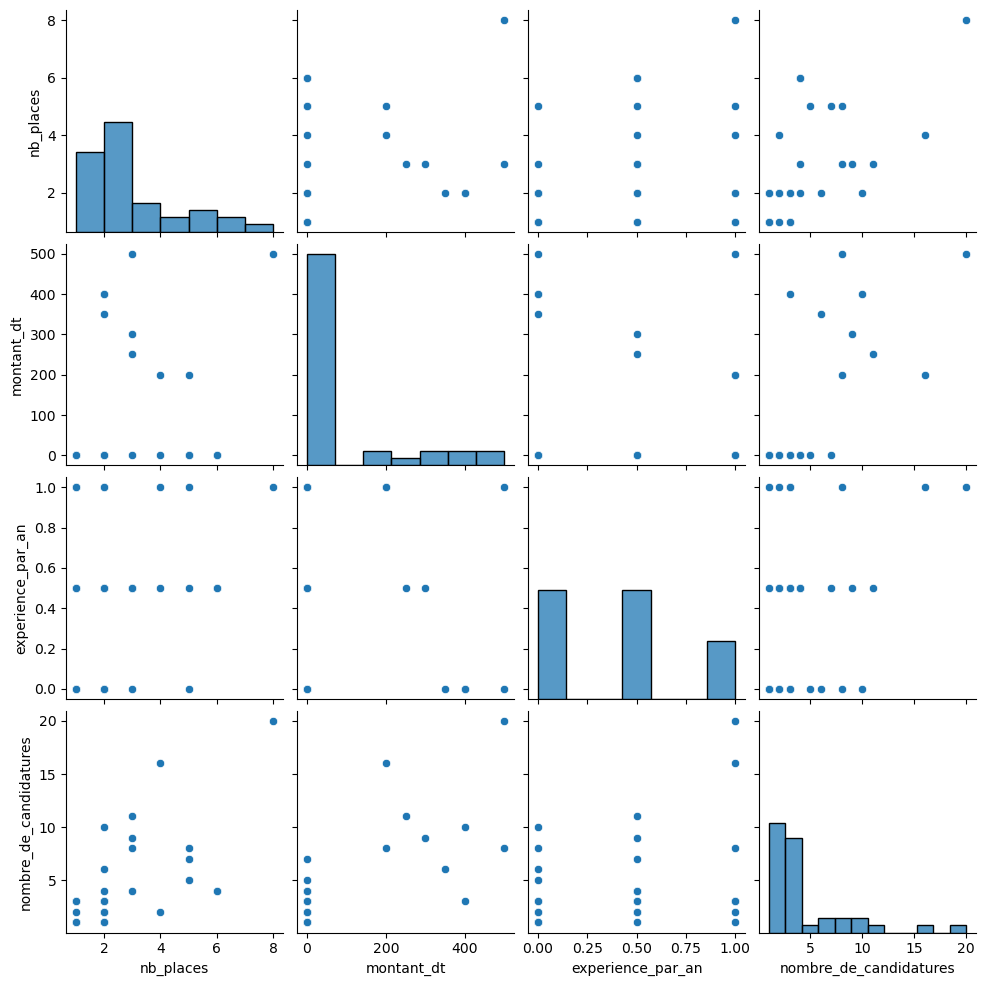

In [36]:
# Visualisation des données
sns.pairplot(data_selected[['nb_places', 'montant_dt', 'Speciality', 'experience_par_an', 'nombre_de_candidatures']])
plt.show()

In [37]:
correlation_matrix = data_selected[['nb_places', 'montant_dt', 'Speciality', 'experience_par_an', 'nombre_de_candidatures']].corr(numeric_only=True)
print(correlation_matrix)

                        nb_places  montant_dt  experience_par_an  \
nb_places                1.000000    0.343387           0.262589   
montant_dt               0.343387    1.000000          -0.039994   
experience_par_an        0.262589   -0.039994           1.000000   
nombre_de_candidatures   0.649088    0.733135           0.334348   

                        nombre_de_candidatures  
nb_places                             0.649088  
montant_dt                            0.733135  
experience_par_an                     0.334348  
nombre_de_candidatures                1.000000  


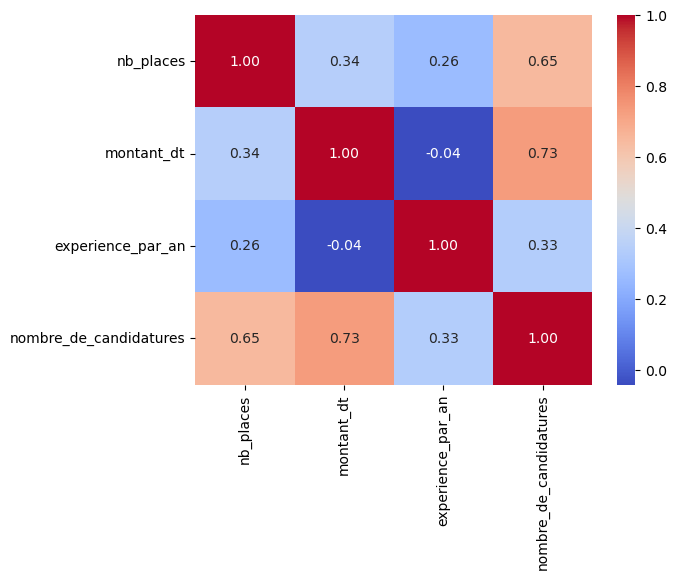

In [38]:
# Visualisation de la corrélation avec une heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

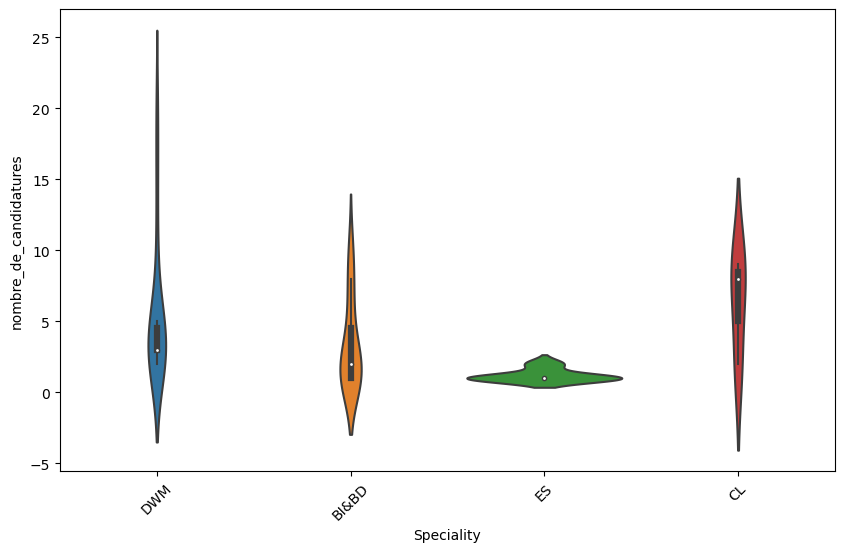

In [39]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Speciality', y='nombre_de_candidatures', data=data_selected)
plt.xticks(rotation=45)
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le label encoder
label_encoder = LabelEncoder()

# Appliquer le label encoder sur la colonne 'Speciality'
data_selected['Speciality_encoded'] = label_encoder.fit_transform(data_selected['Speciality'])

In [41]:
data_selected.head()

,nb_places,montant_dt,Speciality,experience_par_an,nombre_de_candidatures,Speciality_encoded
0,2,0.0,DWM,0.0,3,2
1,2,400.0,BI&BD,0.0,10,0
2,1,0.0,ES,1.0,1,3
3,5,0.0,DWM,0.0,5,2
4,3,300.0,CL,0.5,9,1


In [42]:
# Supprimer la colonne "Speciality"
data_selected.drop(columns=['Speciality'], inplace=True)
data_selected.head()

,nb_places,montant_dt,experience_par_an,nombre_de_candidatures,Speciality_encoded
0,2,0.0,0.0,3,2
1,2,400.0,0.0,10,0
2,1,0.0,1.0,1,3
3,5,0.0,0.0,5,2
4,3,300.0,0.5,9,1


In [43]:
# Réorganiser les colonnes pour mettre "nombre_de_candidatures" à la fin
columns_reordered = list(data_selected.columns)
columns_reordered.remove('nombre_de_candidatures')
columns_reordered.append('nombre_de_candidatures')

# Réindexer le DataFrame avec les colonnes réorganisées
data_selected = data_selected.reindex(columns=columns_reordered)

In [44]:
data_selected.head()

,nb_places,montant_dt,experience_par_an,Speciality_encoded,nombre_de_candidatures
0,2,0.0,0.0,2,3
1,2,400.0,0.0,0,10
2,1,0.0,1.0,3,1
3,5,0.0,0.0,2,5
4,3,300.0,0.5,1,9


In [45]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les caractéristiques numériques à centrer et réduire
features_to_scale = ['nb_places', 'montant_dt', 'experience_par_an', 'Speciality_encoded']

# Initialiser le StandardScaler
scaler = StandardScaler()

# Centrer et réduire les caractéristiques sélectionnées
data_scaled = data_selected.copy()  # Copie des données originales
data_scaled[features_to_scale] = scaler.fit_transform(data_scaled[features_to_scale])

In [46]:
data_scaled.head()

,nb_places,montant_dt,experience_par_an,Speciality_encoded,nombre_de_candidatures
0,-0.312959,-0.523696,-1.079281,0.503793,3
1,-0.312959,2.044106,-1.079281,-1.410620,10
2,-0.907580,-0.523696,1.566699,1.460999,1
3,1.470906,-0.523696,-1.079281,0.503793,5
4,0.281663,1.402155,0.243709,-0.453413,9


In [47]:
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques (X) de la cible (y)
X = data_scaled.drop(columns=['nombre_de_candidatures'])
y = data_scaled['nombre_de_candidatures']

# Diviser les données en ensembles d'entraînement et de test (par exemple, 80% pour l'entraînement et 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initialiser les modèles de régression
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor()
svm_reg = SVR()

# Entraîner les modèles sur les données d'entraînement
linear_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
svm_reg.fit(X_train, y_train)

SVR()

In [49]:
from sklearn.metrics import r2_score

# Calculer le R² pour chaque modèle
r2_linear_reg = r2_score(y_test, linear_reg.predict(X_test))
r2_random_forest_reg = r2_score(y_test, random_forest_reg.predict(X_test))
r2_svm_reg = r2_score(y_test, svm_reg.predict(X_test))

print("R² Linear Regression:", r2_linear_reg)
print("R² Random Forest Regression:", r2_random_forest_reg)
print("R² SVM Regression:", r2_svm_reg)

R² Linear Regression: -1.2436847656788208
R² Random Forest Regression: -0.3943936370318242
R² SVM Regression: 0.4305348486200218


In [50]:
from sklearn.metrics import mean_absolute_error

# Calculer le MAE pour chaque modèle
mae_linear_reg = mean_absolute_error(y_test, linear_reg.predict(X_test))
mae_random_forest_reg = mean_absolute_error(y_test, random_forest_reg.predict(X_test))
mae_svm_reg = mean_absolute_error(y_test, svm_reg.predict(X_test))

print("MAE Linear Regression:", mae_linear_reg)
print("MAE Random Forest Regression:", mae_random_forest_reg)
print("MAE SVM Regression:", mae_svm_reg)

MAE Linear Regression: 3.161631263476094
MAE Random Forest Regression: 2.4933333333333336
MAE SVM Regression: 1.840620574943928


In [51]:
from sklearn.metrics import mean_squared_log_error

# Calculer le MSLE pour chaque modèle
msle_linear_reg = mean_squared_log_error(y_test, linear_reg.predict(X_test))
msle_random_forest_reg = mean_squared_log_error(y_test, random_forest_reg.predict(X_test))
msle_svm_reg = mean_squared_log_error(y_test, svm_reg.predict(X_test))

print("MSLE Linear Regression:", msle_linear_reg)
print("MSLE Random Forest Regression:", msle_random_forest_reg)
print("MSLE SVM Regression:", msle_svm_reg)


MSLE Linear Regression: 0.2897423496281153
MSLE Random Forest Regression: 0.23964371010765295
MSLE SVM Regression: 0.1502343163036799


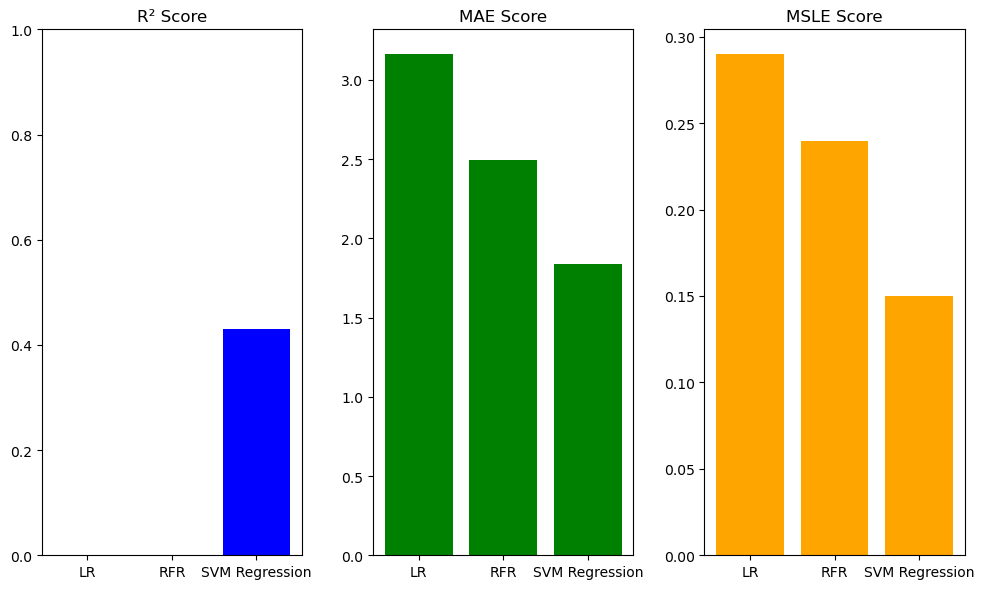

In [54]:
import matplotlib.pyplot as plt

# Métriques pour chaque modèle
models = ['LR', 'RFR', 'SVM Regression']
r2_scores = [r2_linear_reg, r2_random_forest_reg, r2_svm_reg]
mae_scores = [mae_linear_reg, mae_random_forest_reg, mae_svm_reg]
msle_scores = [msle_linear_reg, msle_random_forest_reg, msle_svm_reg]

# Tracer les performances des modèles
plt.figure(figsize=(10, 6))

# Tracer le R²
plt.subplot(1, 3, 1)
plt.bar(models, r2_scores, color='blue')
plt.title('R² Score')
plt.ylim(0, 1)

# Tracer le MAE
plt.subplot(1, 3, 2)
plt.bar(models, mae_scores, color='green')
plt.title('MAE Score')

# Tracer le MSLE
plt.subplot(1, 3, 3)
plt.bar(models, msle_scores, color='orange')
plt.title('MSLE Score')

plt.tight_layout()
plt.show()

In [53]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import re
import builtins
import streamlit as st
import pandas as pd
import numpy as np
import re
import types  # Import the types module

def extract_amount(intitule):
    pattern = r'(\d+)dt'
    match = re.search(pattern, intitule)
    return int(match.group(1)) if match else 0

def process_experience(intitule):
    pattern = r'(\d+)\s*(an|année|mois)'
    match = re.search(pattern, str(intitule))
    if match:
        number = int(match.group(1))
        unit = match.group(2)
        return number if unit in ['an', 'année'] else number / 12
    return 0

# Correctly using types.FunctionType to handle function hashing in Streamlit's cache
@st.cache(hash_funcs={types.FunctionType: lambda _: None})
def load_data():
    data = pd.read_csv('offreObjectif2.csv')
    data['montant_dt'] = data['intitule'].apply(extract_amount)
    data['experience_par_an'] = data['intitule'].apply(process_experience)
    return data

data = load_data()


# Préparation des données pour les modèles
X = data[['nb_places', 'montant_dt', 'experience_par_an']]
y = data['nombre_de_candidatures']

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Interface utilisateur
st.title('Prédiction du Nombre de Candidatures')
nb_places = st.number_input('Nombre de places', min_value=0, value=5)
montant_dt = st.number_input('Montant DT', min_value=0, value=500)
experience_par_an = st.number_input('Expérience par an', min_value=0, value=2)

# Bouton de prédiction
if st.button('Prédire'):
    features = pd.DataFrame([[nb_places, montant_dt, experience_par_an]], columns=['nb_places', 'montant_dt', 'experience_par_an'])
    prediction = model.predict(features)
    st.write(f'Prédiction du nombre de candidatures : {prediction[0]}')


2024-05-09 03:26:36.642 
  command:

    streamlit run C:\Users\MSII\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-05-09 03:26:36.649 `st.cache` is deprecated. Please use one of Streamlit's new caching commands,
`st.cache_data` or `st.cache_resource`.

More information [in our docs](https://docs.streamlit.io/library/advanced-features/caching).
2024-05-09 03:26:36.654 Session state does not function when running a script without `streamlit run`
